# Author : Sandaru Malshan
# Peer Reviewer :[]
# Date of peer Review:[]

In [62]:
# installing the data manipulations library
!pip install pandas

## Import some Required Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, roc_auc_score, roc_curve)

import warnings
warnings.filterwarnings("ignore")

print("Import Required Libraries")

Import Required Libraries


## Load the Dataset

In [64]:
print("===========================================================")
print("Load the Cleaned Classification Dataset (from Notebook 1)")
print("===========================================================")
data_frame = pd.read_csv("/content/classification_dataset.csv")

data_frame.info()

Load the Cleaned Classification Dataset (from Notebook 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3723 non-null   float64
 1   Sex                     3723 non-null   int64  
 2   T_Stage                 3723 non-null   int64  
 3   N_Stage                 3723 non-null   int64  
 4   6th_Stage               3723 non-null   int64  
 5   Differentiated          3723 non-null   int64  
 6   Grade                   3723 non-null   int64  
 7   A_Stage                 3723 non-null   int64  
 8   Tumor_Size              3723 non-null   float64
 9   Estrogen_Status         3723 non-null   int64  
 10  Progesterone_Status     3723 non-null   int64  
 11  Regional_Node_Examined  3723 non-null   float64
 12  Reginol_Node_Positive   3723 non-null   int64  
 13  Mortality_Status        3723 non-nu

##Selecting Feature

In [65]:
x = data_frame.drop("Mortality_Status", axis=1)
y = data_frame["Mortality_Status"]

print("==== x data ====")
print(x.head())
print("\n==== y data ====\n")
print(y.head())

==== x data ====
    Age  Sex  T_Stage  N_Stage  6th_Stage  Differentiated  Grade  A_Stage  Tumor_Size  Estrogen_Status  Progesterone_Status  Regional_Node_Examined  Reginol_Node_Positive
0  68.0    1        0        0          0               1      3        1         4.0                1                    1                    24.0                      1
1  50.0    1        1        1          2               0      2        1        35.0                1                    1                    14.0                      5
2  58.0    1        2        2          4               0      2        1        63.0                1                    1                    14.0                      7
3  58.0    1        0        0          0               1      3        1        18.0                1                    1                     2.0                      1
4  47.0    1        1        0          1               1      3        1        41.0                1                    1     

### Data Standardization

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= scaler.fit_transform(x)
print(x[:5])


[[ 1.55833682  0.0697015  -0.99454911 -0.60124694 -0.99735586  0.30183191
   1.34732551  0.13943243 -1.52264696  0.25838378  0.45174665  1.38134667
  -0.61385628]
 [-0.45408073  0.0697015   0.41923719  0.89603892  0.63122128 -0.67616653
  -0.22364     0.13943243  0.54336902  0.25838378  0.45174665  0.02183688
   0.24450501]
 [ 0.44032707  0.0697015   1.8330235   2.39332477  2.25979841 -0.67616653
  -0.22364     0.13943243  2.40944797  0.25838378  0.45174665  0.02183688
   0.67368566]
 [ 0.44032707  0.0697015  -0.99454911 -0.60124694 -0.99735586  0.30183191
   1.34732551  0.13943243 -0.58960748  0.25838378  0.45174665 -1.60957488
  -0.61385628]
 [-0.78948365  0.0697015   0.41923719 -0.60124694 -0.18306729  0.30183191
   1.34732551  0.13943243  0.94324308  0.25838378  0.45174665 -1.4736239
  -0.61385628]]


### Divide data set training and testing

In [67]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('Whole Data shape', data_frame.shape)
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)

Whole Data shape (3723, 14)
X_train shape (2978, 13)
X_test shape (745, 13)


### PCA (Dimensionality Reduction)

In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_)

PCA Explained Variance Ratio: [0.27378065 0.12481924 0.11447063 0.09490519 0.07873551]


# Train and Evaluate Classifiers

### Logistic Regression

In [69]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)
pread =lr.predict(X_test_pca)

In [70]:
Comparison_df = pd.DataFrame({'Actual Mortality_Status' : y_test,  'Predicted' : pread })
Comparison_df.to_csv(r'/content/classification_dataset.csv', index=False)
Comparison_df

,Actual Mortality_Status,Predicted
2069,0,0
3257,0,0
1789,0,0
3333,0,0
2066,0,1
...,...,...
2016,0,0
1237,0,0
1351,0,0
1578,1,0


              precision    recall  f1-score   support

           0       0.88      0.99      0.93       648
           1       0.57      0.08      0.14        97

    accuracy                           0.87       745
   macro avg       0.72      0.54      0.54       745
weighted avg       0.84      0.87      0.83       745



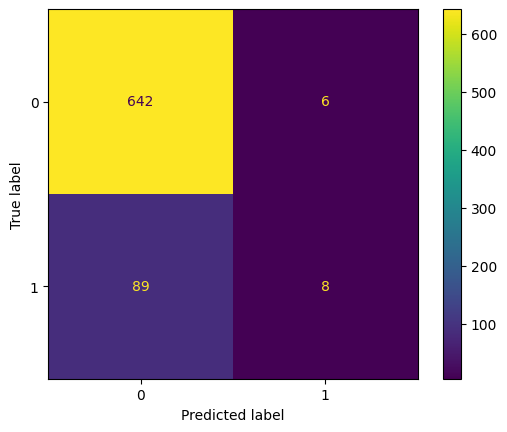

In [71]:
# To plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Construct the confusion matrix cm
cm = confusion_matrix(y_test, pread, labels=lr.classes_)
# Create a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(cm,display_labels=lr.classes_)
disp.plot()

#The classification metrics report
from sklearn.metrics import classification_report
print(classification_report(y_test,pread))

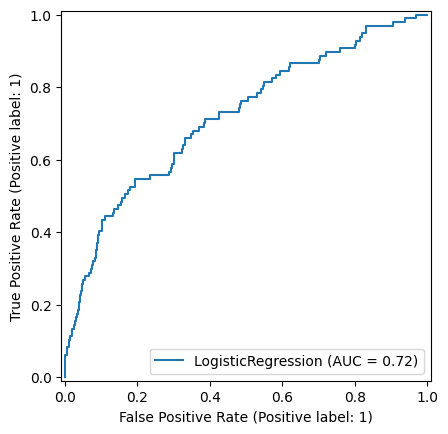

In [72]:
# Import the function from the package
from sklearn.metrics import RocCurveDisplay
# Apply the function by specifying the name of your model and test data.
Logreg_roc = RocCurveDisplay.from_estimator(lr, X_test_pca, y_test)


### Naive Bayes

In [73]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_pca, y_train)
Naive_pread =nb.predict(X_test_pca)

In [74]:
Comparison_df = pd.DataFrame({'Actual Mortality_Status' : y_test,  'Predicted' : Naive_pread  })
Comparison_df.to_csv(r'/content/classification_dataset.csv', index=False)
Comparison_df

,Actual Mortality_Status,Predicted
2069,0,0
3257,0,0
1789,0,1
3333,0,0
2066,0,1
...,...,...
2016,0,0
1237,0,0
1351,0,0
1578,1,1


              precision    recall  f1-score   support

           0       0.90      0.93      0.92       648
           1       0.40      0.31      0.35        97

    accuracy                           0.85       745
   macro avg       0.65      0.62      0.63       745
weighted avg       0.83      0.85      0.84       745



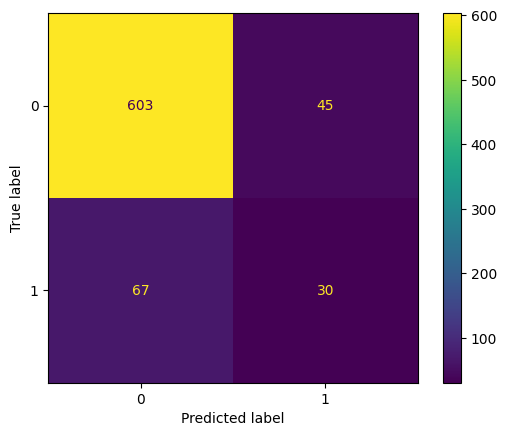

In [75]:
# To plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Construct the confusion matrix cm
cm = confusion_matrix(y_test, Naive_pread , labels=nb.classes_)
# Create a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(cm,display_labels=nb.classes_)
disp.plot()

#The classification metrics report
from sklearn.metrics import classification_report
print(classification_report(y_test,Naive_pread))

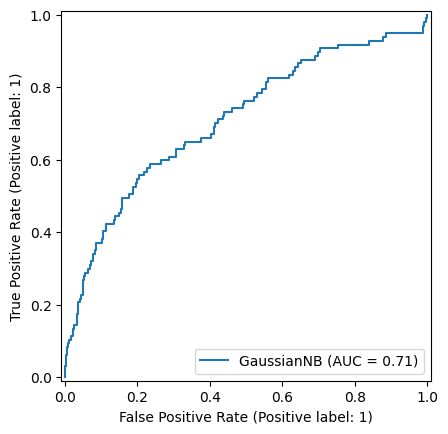

In [76]:
# Import the function from the package
from sklearn.metrics import RocCurveDisplay
# Apply the function by specifying the name of your model and test data.
Navi_roc = RocCurveDisplay.from_estimator(nb, X_test_pca, y_test)

### K-Nearest Neighbors

In [77]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
K_Nearest_pread =knn.predict(X_test_pca)

In [78]:
Comparison_df = pd.DataFrame({'Actual Mortality_Status' : y_test,  'Predicted' :K_Nearest_pread })
Comparison_df.to_csv(r'/content/classification_dataset.csv', index=False)
Comparison_df

,Actual Mortality_Status,Predicted
2069,0,0
3257,0,0
1789,0,0
3333,0,0
2066,0,1
...,...,...
2016,0,0
1237,0,0
1351,0,0
1578,1,0


              precision    recall  f1-score   support

           0       0.88      0.97      0.92       648
           1       0.35      0.11      0.17        97

    accuracy                           0.86       745
   macro avg       0.62      0.54      0.55       745
weighted avg       0.81      0.86      0.82       745



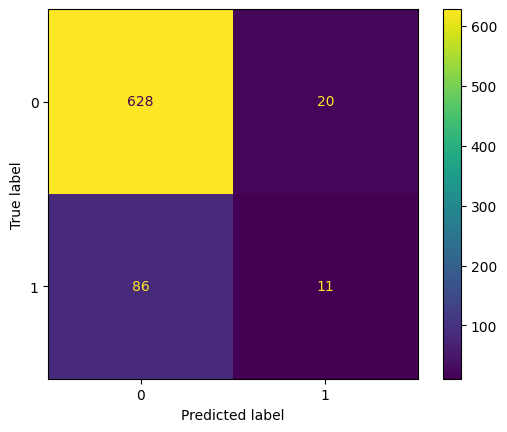

In [79]:
# To plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Construct the confusion matrix cm
cm = confusion_matrix(y_test, K_Nearest_pread, labels=knn.classes_)
# Create a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(cm,display_labels=knn.classes_)
disp.plot()

#The classification metrics report
from sklearn.metrics import classification_report
print(classification_report(y_test,K_Nearest_pread))

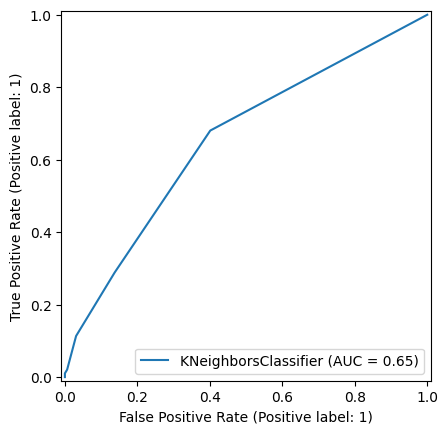

In [80]:
# Import the function from the package
from sklearn.metrics import RocCurveDisplay
# Apply the function by specifying the name of your model and test data.
K_Nearest_roc = RocCurveDisplay.from_estimator(knn, X_test_pca, y_test)

### Hyperparameter Tuning for KNN

In [81]:
param_grid = {'n_neighbors': range(1, 21)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X_train_pca, y_train)

print("Best K for KNN:", grid_knn.best_params_)


Best K for KNN: {'n_neighbors': 20}


In [50]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
new_knn = KNeighborsClassifier(n_neighbors=20)
new_knn.fit(X_train_pca, y_train)
new_K_Nearest_pread =new_knn.predict(X_test_pca)

In [82]:
Comparison_df = pd.DataFrame({'Actual Mortality_Status' : y_test,  'Predicted' :new_K_Nearest_pread })
Comparison_df.to_csv(r'/content/classification_dataset.csv', index=False)
Comparison_df

,Actual Mortality_Status,Predicted
2069,0,0
3257,0,0
1789,0,0
3333,0,0
2066,0,1
...,...,...
2016,0,0
1237,0,0
1351,0,0
1578,1,0


              precision    recall  f1-score   support

           0       0.88      1.00      0.93       648
           1       0.67      0.06      0.11        97

    accuracy                           0.87       745
   macro avg       0.77      0.53      0.52       745
weighted avg       0.85      0.87      0.83       745



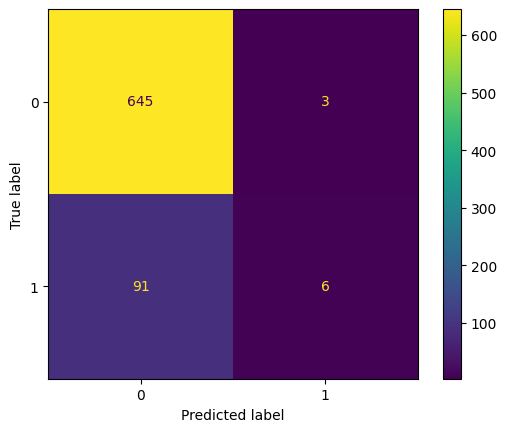

In [83]:
# To plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Construct the confusion matrix cm
cm = confusion_matrix(y_test, new_K_Nearest_pread, labels=new_knn.classes_)
# Create a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(cm,display_labels=new_knn.classes_)
disp.plot()

#The classification metrics report
from sklearn.metrics import classification_report
print(classification_report(y_test,new_K_Nearest_pread))

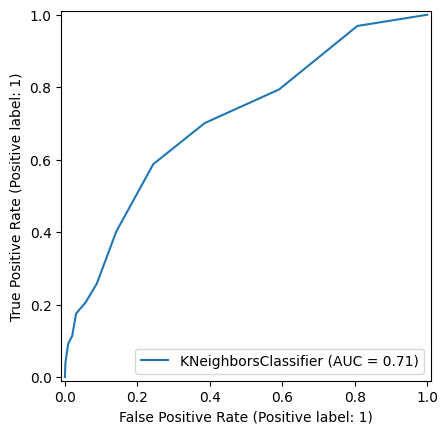

In [84]:
# Import the function from the package
from sklearn.metrics import RocCurveDisplay
# Apply the function by specifying the name of your model and test data.
K_Nearest_roc = RocCurveDisplay.from_estimator(new_knn, X_test_pca, y_test)

### Final Summary

In [85]:
print("\nSUMMARY")
print("- Applied StandardScaler and PCA (5 components).")
print("- Trained 3 classifiers: Logistic Regression, Naive Bayes, KNN.")
print("- Evaluated with Accuracy, Precision, Recall, F1, Confusion Matrix, ROC AUC.")
print("- Tuned KNN using GridSearchCV.")


SUMMARY
- Applied StandardScaler and PCA (5 components).
- Trained 3 classifiers: Logistic Regression, Naive Bayes, KNN.
- Evaluated with Accuracy, Precision, Recall, F1, Confusion Matrix, ROC AUC.
- Tuned KNN using GridSearchCV.
